<a href="https://colab.research.google.com/github/cwcheng0/practicepython/blob/master/SKLEarn_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# SKLearn DNN
# source1 video http://www.peixun.net/main.php?mod=course&cid=1281
# 2019-2-22
import numpy as np
from sklearn.neural_network import MLPClassifier as DNN
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score as cv
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.model_selection import train_test_split as TTS
from time import time
import datetime

data = load_breast_cancer()
X = data.data
y = data.target

In [11]:
data.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [12]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [13]:
##
Xtrain, Xtest, Ytrain, Ytest = TTS(X,y,test_size=0.3,random_state=420)

##建模，使用交叉验证导出分数
times = time()
dnn = DNN(hidden_layer_sizes=(100,),random_state=420)

print(cv(dnn,X,y,cv=5).mean())
print(time() - times)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.9296344747979992
1.9851391315460205


In [14]:
##
#使用决策树进行一个对比
times = time()
clf = DTC(random_state=420)

print(cv(clf,X,y,cv=5).mean())
print(time() - times)

0.9173989996152366
0.05436372756958008


In [15]:
## check hidden_layer_sizes
dnn = DNN(hidden_layer_sizes=(100,),random_state=420).fit(Xtrain,Ytrain)
dnn.score(Xtest,Ytest)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.9005847953216374

In [16]:
##使用重要参数n_layers_
dnn.n_layers_
#可见，默认层数是三层，由于必须要有输入和输出层，所以默认其实就只有一层隐藏层

3

In [18]:
#如果增加一个隐藏层上的神经元个数，会发生什么呢？
dnn = DNN(hidden_layer_sizes=(200,),random_state=420)
dnn = dnn.fit(Xtrain,Ytrain)
dnn.score(Xtest,Ytest)
#看似结果会增加嗎?

0.9181286549707602

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


1900 0.9298245614035088


ValueError: ignored

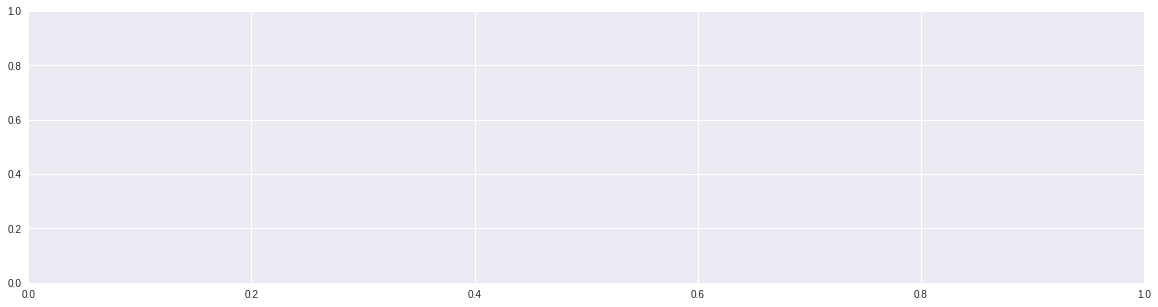

In [19]:
#来试试看学习曲线
s = []
for i in range(100,2000,100):
      dnn = DNN(hidden_layer_sizes=(int(i),),random_state=420).fit(Xtrain,Ytrain)
      s.append(dnn.score(Xtest,Ytest))
print(i,max(s))
plt.figure(figsize=(20,5))
plt.plot(range(200,2000,100),s)
plt.show()

In [0]:
##
DNN-2